In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


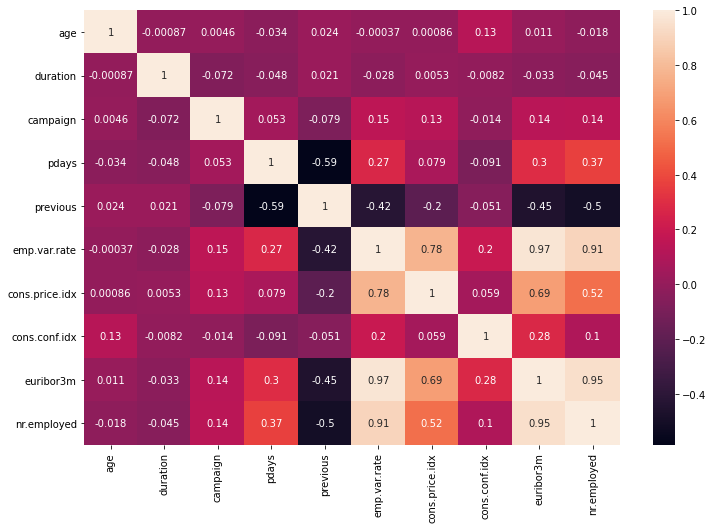

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [10]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [11]:
cat_data = data.select_dtypes(exclude=np.number)
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [12]:
for i in cat_data.columns:
    print(cat_data[i].value_counts(normalize=True)*100)
    print('*'*100)

admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64
****************************************************************************************************
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64
****************************************************************************************************
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: education, dtype: float64
**********************************

In [13]:
num_data = data.select_dtypes(include=np.number)
num_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


C:\Users\Samriddhi\sample\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


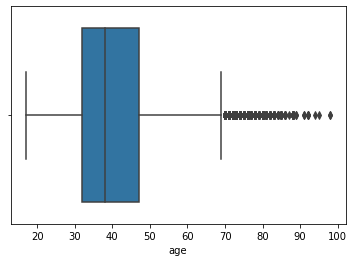

C:\Users\Samriddhi\sample\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


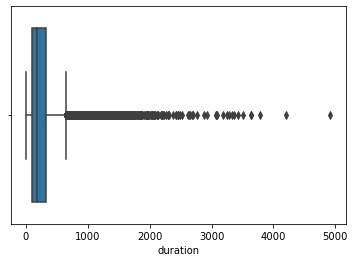

C:\Users\Samriddhi\sample\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


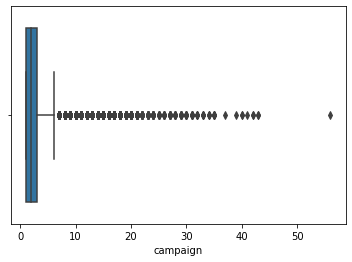

C:\Users\Samriddhi\sample\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


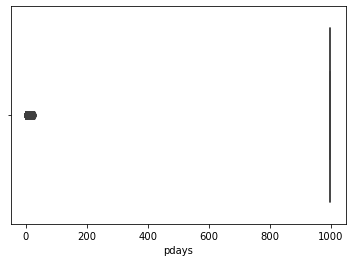

C:\Users\Samriddhi\sample\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


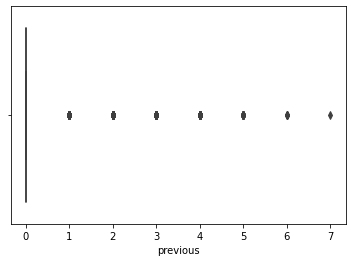

C:\Users\Samriddhi\sample\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


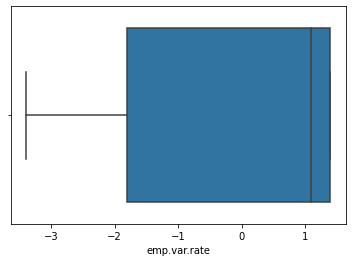

C:\Users\Samriddhi\sample\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


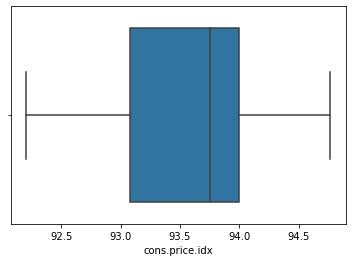

C:\Users\Samriddhi\sample\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


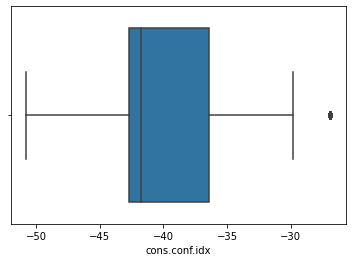

C:\Users\Samriddhi\sample\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


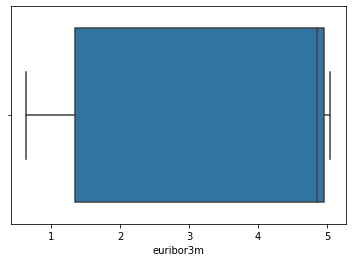

C:\Users\Samriddhi\sample\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


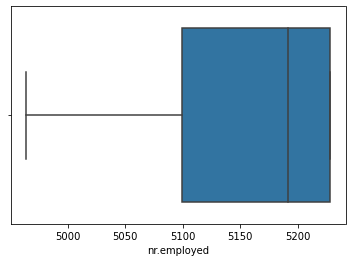

In [14]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

In [15]:
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [16]:
plt.rcParams['figure.figsize']=(8,6)

### UNIVARIATE AND BIVARIATE ANALYSIS

'JOB'

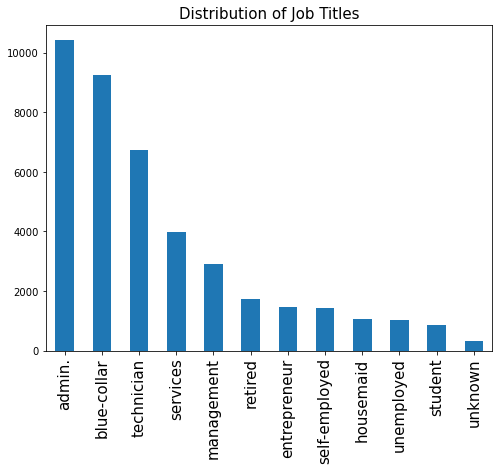

In [17]:
(cat_data['job']).value_counts().plot(kind='bar')
plt.title('Distribution of Job Titles', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [23]:
pd.crosstab(data['job'],data['y'])

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [24]:
pd.crosstab(data['job'],data['y'],normalize=True)*100

y,no,yes
job,,
admin.,22.020977,3.282509
blue-collar,20.918714,1.548995
entrepreneur,3.233952,0.301059
housemaid,2.316209,0.257357
management,6.302807,0.796348
retired,3.122269,1.053705
self-employed,3.088278,0.361756
services,8.852093,0.784209
student,1.456735,0.667670


Customers having job title 'admin' are willing to subscribe more and are also the least subscribing customers as there are more 
number of rows with job title 'admin' in the dataset. 

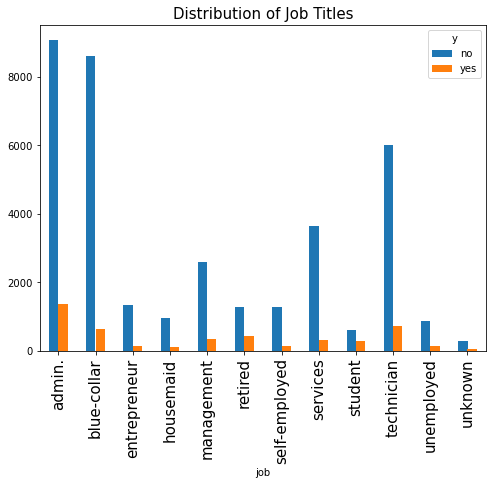

In [25]:
pd.crosstab(data['job'],data['y']).plot(kind='bar')
plt.title('Distribution of Job Titles', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

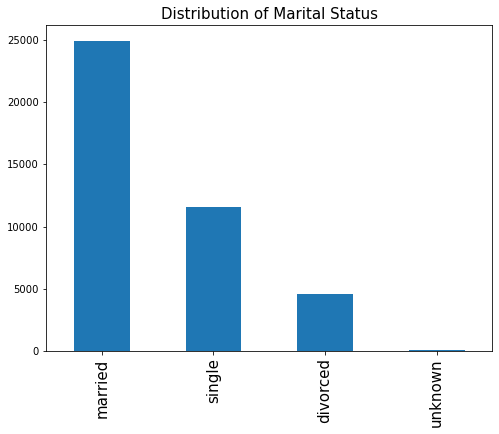

In [26]:
(cat_data['marital']).value_counts().plot(kind='bar')
plt.title('Distribution of Marital Status', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

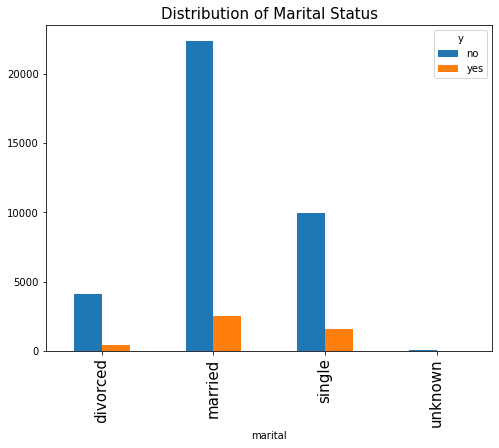

In [27]:
pd.crosstab(data['marital'],data['y']).plot(kind='bar')
plt.title('Distribution of Marital Status', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [28]:
pd.crosstab(data['marital'],data['y'])

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [29]:
pd.crosstab(data['marital'],data['y'],normalize=True)*100

y,no,yes
marital,,
divorced,10.041760,1.155676
married,54.375061,6.147422
single,24.152666,3.933184
unknown,0.165097,0.029135


In [30]:
pd.crosstab(data['marital'],data['y'],normalize='index')*100

y,no,yes
marital,,
divorced,89.679098,10.320902
married,89.842747,10.157253
single,85.995851,14.004149
unknown,85.000000,15.000000


Out of the known categories in the marital column single customers are willing to subscribe the most and married customers 
are subscribing the least.

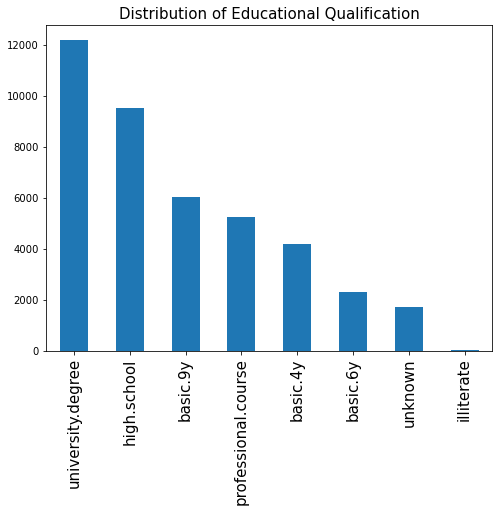

In [31]:
(cat_data['education']).value_counts().plot(kind='bar')
plt.title('Distribution of Educational Qualification', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

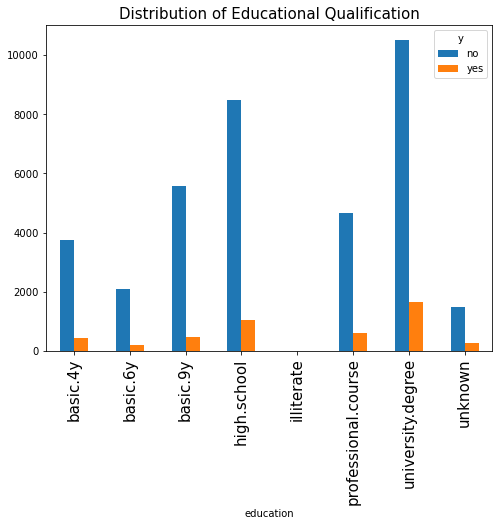

In [32]:
pd.crosstab(data['education'],data['y']).plot(kind='bar')
plt.title('Distribution of Educational Qualification', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [33]:
pd.crosstab(data['education'],data['y'])

y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [34]:
pd.crosstab(data['education'],data['y'],normalize=True)*100

y,no,yes
education,,
basic.4y,9.099738,1.039138
basic.6y,5.108284,0.456444
basic.9y,13.528212,1.148393
high.school,20.598232,2.503156
illiterate,0.033990,0.009712
professional.course,11.284840,1.444596
university.degree,25.488006,4.054579
unknown,3.593280,0.609401


In [35]:
pd.crosstab(data['education'],data['y'],normalize='index')*100

y,no,yes
education,,
basic.4y,89.750958,10.249042
basic.6y,91.797557,8.202443
basic.9y,92.175352,7.824648
high.school,89.164477,10.835523
illiterate,77.777778,22.222222
professional.course,88.651535,11.348465
university.degree,86.275477,13.724523
unknown,85.499711,14.500289


Out of the known categories in the education column illiterate customers are willing to subscribe the most and basic9y customers 
are subscribing the least.

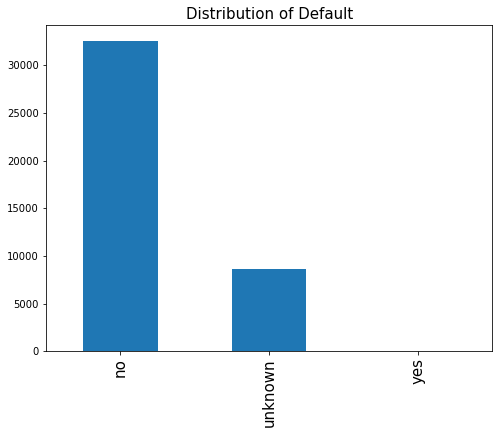

In [36]:
(cat_data['default']).value_counts().plot(kind='bar')
plt.title('Distribution of Default', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

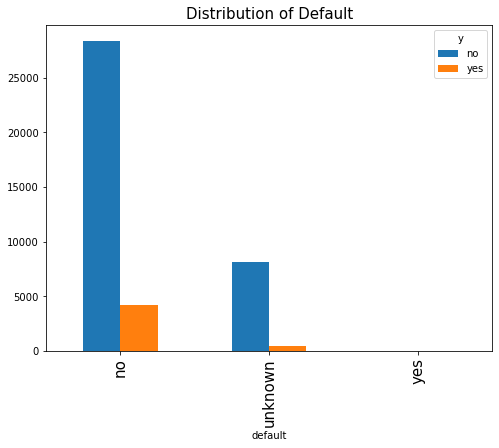

In [37]:
pd.crosstab(data['default'],data['y']).plot(kind='bar')
plt.title('Distribution of Default', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [38]:
pd.crosstab(data['default'],data['y'],normalize=True)*100

y,no,yes
default,,
no,68.930271,10.189861
unknown,19.797028,1.075556
yes,0.007284,0.000000


In [39]:
pd.crosstab(data['default'],data['y'],normalize='index')*100

y,no,yes
default,,
no,87.121026,12.878974
unknown,94.847040,5.152960
yes,100.000000,0.000000


Out of the known categories in the default column non-default customers are willing to subscribe the most and default customers 
are subscribing the least.

In [40]:
pd.crosstab(data['default'],data['y'])

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


In [41]:
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

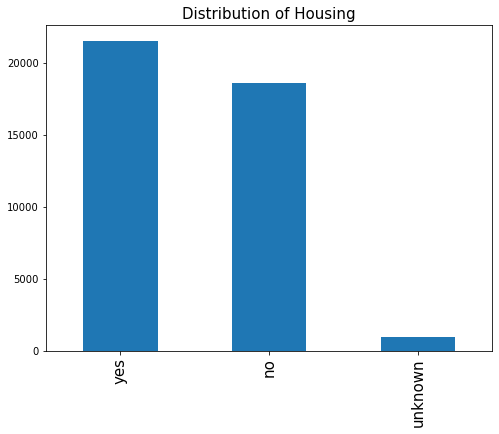

In [42]:
(cat_data['housing']).value_counts().plot(kind='bar')
plt.title('Distribution of Housing', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

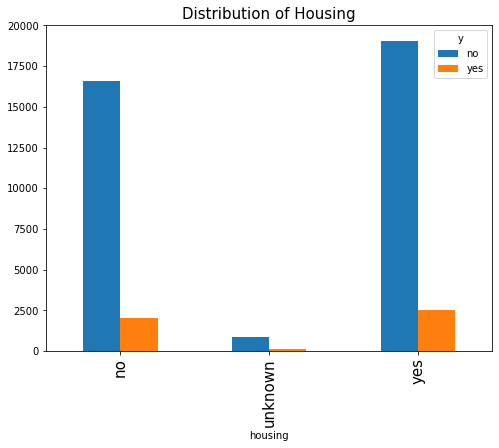

In [43]:
pd.crosstab(data['housing'],data['y']).plot(kind='bar')
plt.title('Distribution of Housing', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [44]:
pd.crosstab(data['housing'],data['y'],normalize=True)*100

y,no,yes
housing,,
no,40.293289,4.918908
unknown,2.143828,0.259784
yes,46.297465,6.086724


In [45]:
pd.crosstab(data['housing'],data['y'],normalize='index')*100

y,no,yes
housing,,
no,89.120395,10.879605
unknown,89.191919,10.808081
yes,88.380608,11.619392


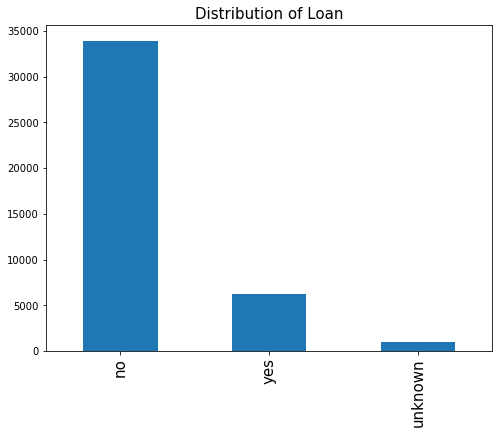

In [46]:
(cat_data['loan']).value_counts().plot(kind='bar')
plt.title('Distribution of Loan', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

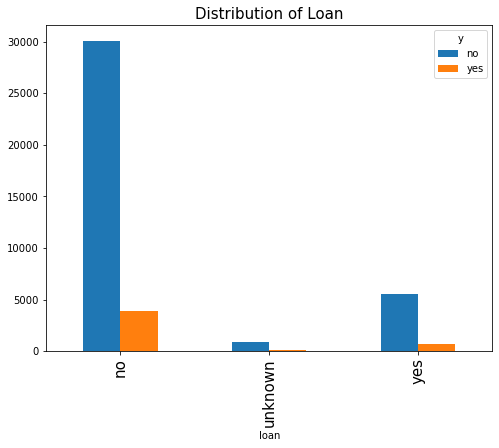

In [47]:
pd.crosstab(data['loan'],data['y']).plot(kind='bar')
plt.title('Distribution of Loan', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [48]:
pd.crosstab(data['loan'],data['y'],normalize=True)*100

y,no,yes
loan,,
no,73.079538,9.347383
unknown,2.143828,0.259784
yes,13.511217,1.658250


In [49]:
pd.crosstab(data['loan'],data['y'],normalize='index')*100

y,no,yes
loan,,
no,88.659794,11.340206
unknown,89.191919,10.808081
yes,89.068502,10.931498


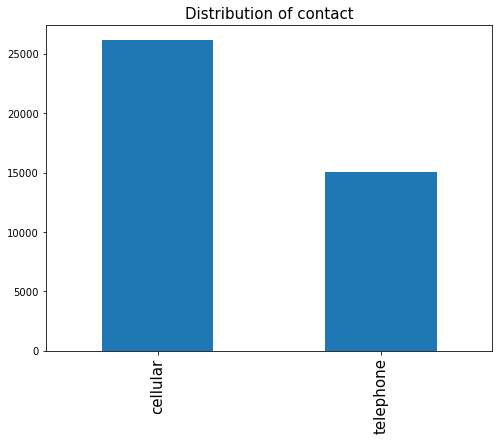

In [50]:
(cat_data['contact']).value_counts().plot(kind='bar')
plt.title('Distribution of contact', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

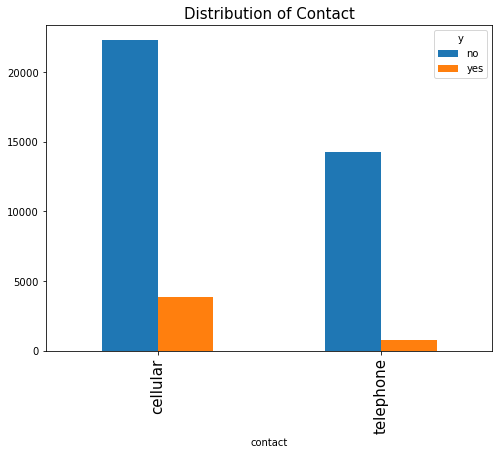

In [51]:
pd.crosstab(data['contact'],data['y']).plot(kind='bar')
plt.title('Distribution of Contact', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [52]:
pd.crosstab(data['contact'],data['y'],normalize=True)*100

y,no,yes
contact,,
cellular,54.120132,9.354666
telephone,34.614451,1.910751


The most used mode of contacting the customers is 'cellular'.

In [53]:
pd.crosstab(data['contact'],data['y'],normalize='index')*100

y,no,yes
contact,,
cellular,85.262393,14.737607
telephone,94.768679,5.231321


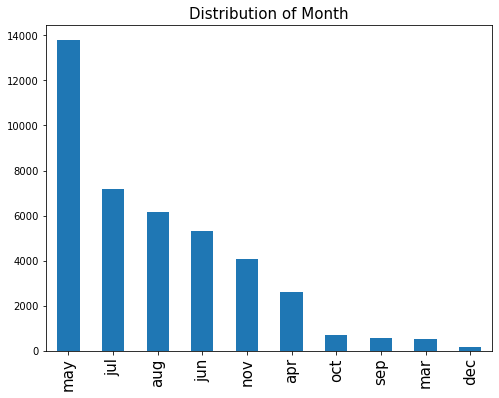

In [54]:
(cat_data['month']).value_counts().plot(kind='bar')
plt.title('Distribution of Month', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

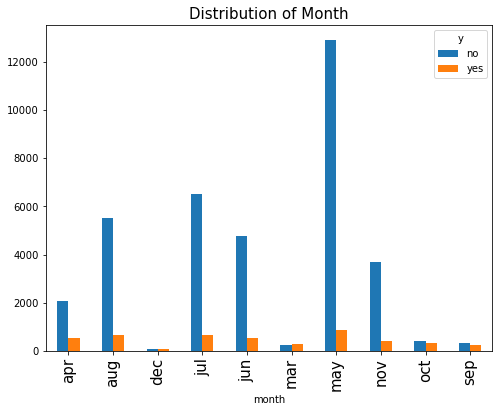

In [55]:
pd.crosstab(data['month'],data['y']).plot(kind='bar')
plt.title('Distribution of Month', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [56]:
pd.crosstab(data['month'],data['y'],normalize=True)*100

y,no,yes
month,,
apr,5.081577,1.308634
aug,13.409245,1.590269
dec,0.225794,0.216082
jul,15.841993,1.575702
jun,11.554336,1.357191
mar,0.655531,0.670098
may,31.278528,2.151112
nov,8.946781,1.010003
oct,0.978440,0.764786


In [57]:
pd.crosstab(data['month'],data['y'],normalize='index')*100

y,no,yes
month,,
apr,79.521277,20.478723
aug,89.397863,10.602137
dec,51.098901,48.901099
jul,90.953443,9.046557
jun,89.488530,10.511470
mar,49.450549,50.549451
may,93.565255,6.434745
nov,89.856133,10.143867
oct,56.128134,43.871866


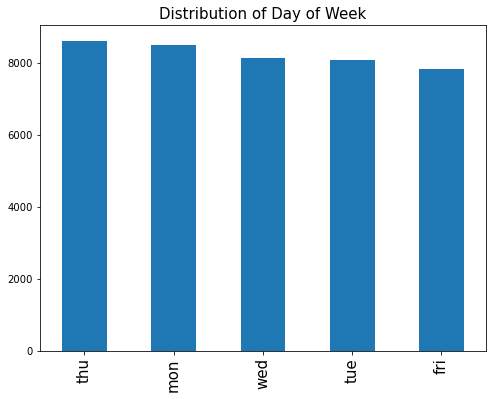

In [58]:
(cat_data['day_of_week']).value_counts().plot(kind='bar')
plt.title('Distribution of Day of Week', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

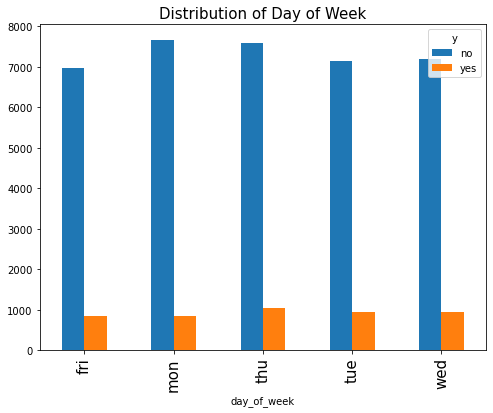

In [59]:
pd.crosstab(data['day_of_week'],data['y']).plot(kind='bar')
plt.title('Distribution of Day of Week', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [60]:
pd.crosstab(data['day_of_week'],data['y'],normalize=True)*100

y,no,yes
day_of_week,,
fri,16.949111,2.053996
mon,18.614645,2.056424
thu,18.398563,2.537147
tue,17.327862,2.313781
wed,17.444401,2.304069


In [61]:
pd.crosstab(data['day_of_week'],data['y'],normalize='index')*100

y,no,yes
day_of_week,,
fri,89.191261,10.808739
mon,90.051680,9.948320
thu,87.881248,12.118752
tue,88.220025,11.779975
wed,88.332924,11.667076


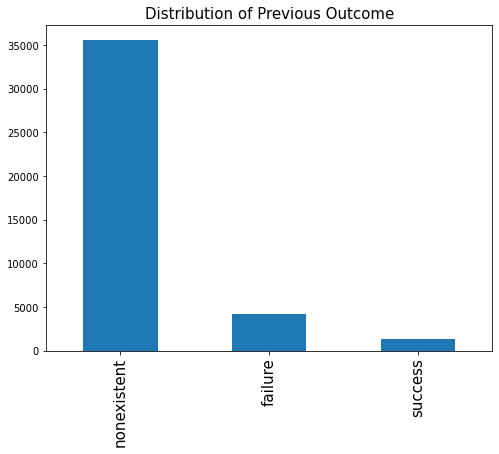

In [62]:
(cat_data['poutcome']).value_counts().plot(kind='bar')
plt.title('Distribution of Previous Outcome', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

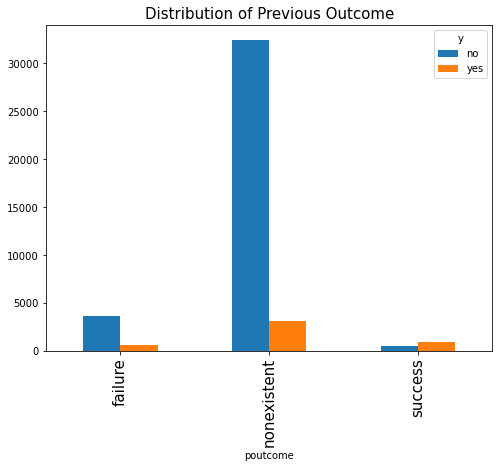

In [63]:
pd.crosstab(data['poutcome'],data['y']).plot(kind='bar')
plt.title('Distribution of Previous Outcome', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [64]:
pd.crosstab(data['poutcome'],data['y'],normalize=True)*100

y,no,yes
poutcome,,
failure,8.854521,1.468874
nonexistent,78.717102,7.626008
success,1.162960,2.170535


In [65]:
pd.crosstab(data['poutcome'],data['y'],normalize='index')*100

y,no,yes
poutcome,,
failure,85.771402,14.228598
nonexistent,91.167787,8.832213
success,34.887109,65.112891


In [66]:
num_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [67]:
num_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


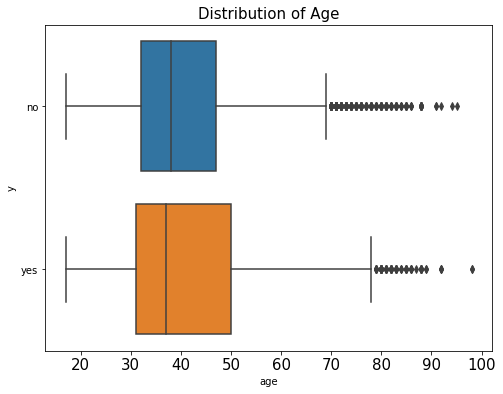

In [68]:
sns.boxplot(data['age'],data['y'])
plt.title('Distribution of Age', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

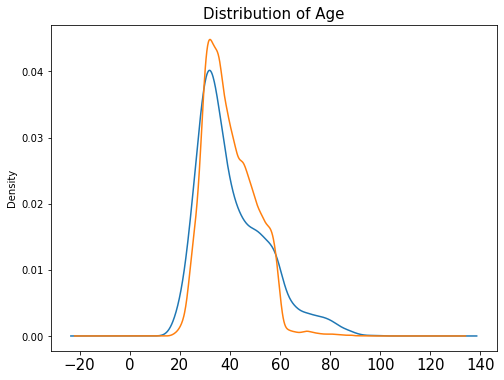

In [69]:
data[data['y']=='yes']['age'].plot(kind='kde')
data[data['y']=='no']['age'].plot(kind='kde')
plt.title('Distribution of Age', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

The 'age' feature may not be an important feature in predicting the target variable since the distribution is almost same.

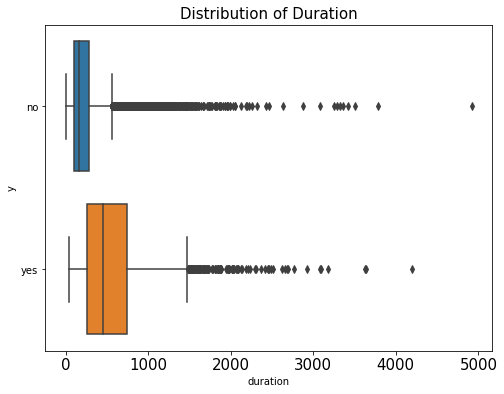

In [70]:
sns.boxplot(data['duration'],data['y'])
plt.title('Distribution of Duration', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

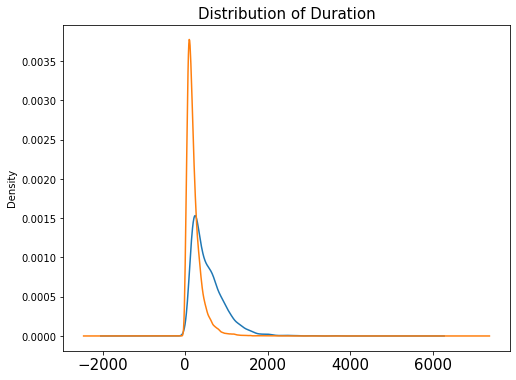

In [71]:
data[data['y']=='yes']['duration'].plot(kind='kde')
data[data['y']=='no']['duration'].plot(kind='kde')
plt.title('Distribution of Duration', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

The 'duration' feature can be an important feature. 

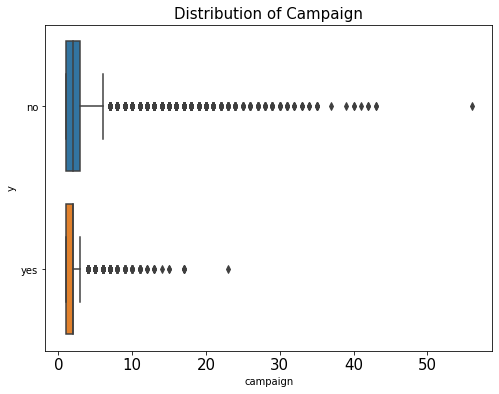

In [72]:
sns.boxplot(data['campaign'],data['y'])
plt.title('Distribution of Campaign', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

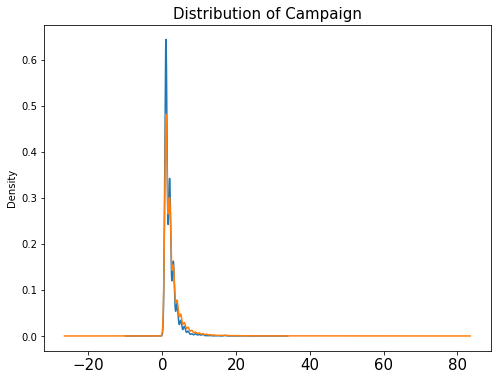

In [73]:
data[data['y']=='yes']['campaign'].plot(kind='kde')
data[data['y']=='no']['campaign'].plot(kind='kde')
plt.title('Distribution of Campaign', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

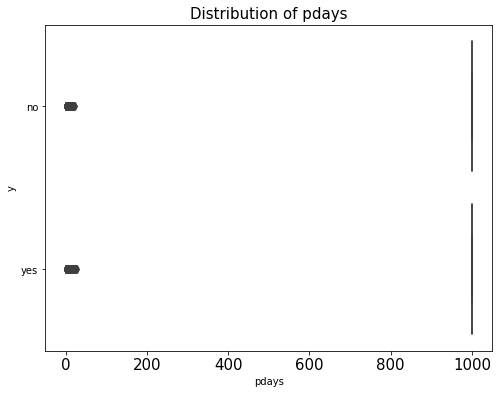

In [74]:
sns.boxplot(data['pdays'],data['y'])
plt.title('Distribution of pdays', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

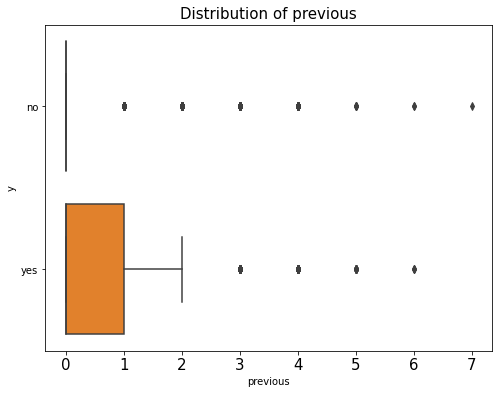

In [75]:
sns.boxplot(data['previous'],data['y'])
plt.title('Distribution of previous', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

In [76]:
num_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

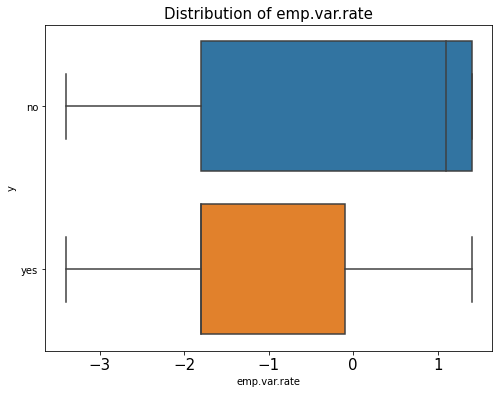

In [77]:
sns.boxplot(data['emp.var.rate'],data['y'])
plt.title('Distribution of emp.var.rate', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

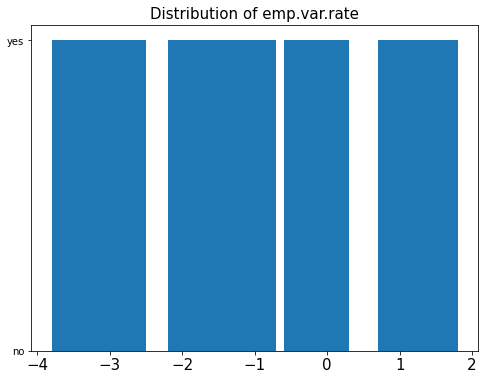

In [78]:
plt.bar(data['emp.var.rate'],data['y'])
plt.title('Distribution of emp.var.rate', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

In [79]:
data['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [80]:
data['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

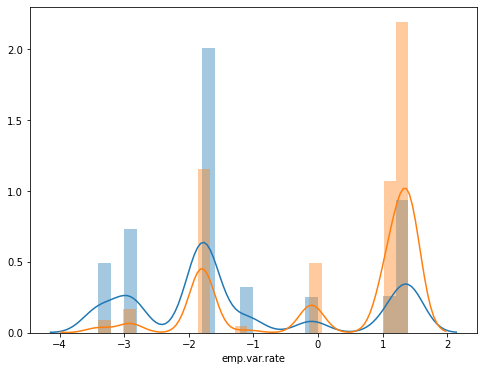

In [81]:
sns.distplot(data[data['y']=='yes']['emp.var.rate'])
sns.distplot(data[data['y']=='no']['emp.var.rate'])

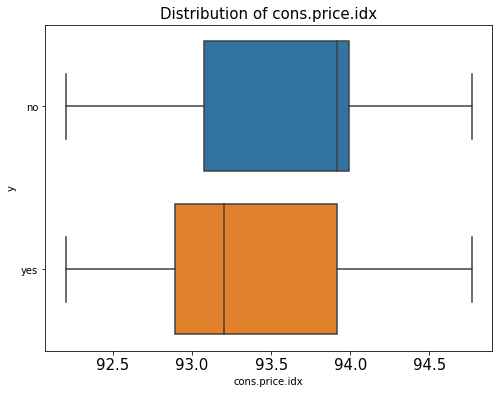

In [82]:
sns.boxplot(data['cons.price.idx'],data['y'])
plt.title('Distribution of cons.price.idx', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

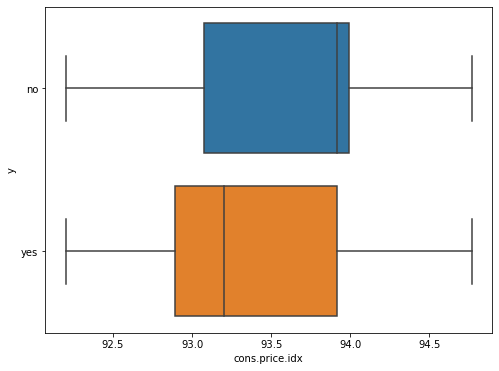

In [83]:
sns.boxplot(data['cons.price.idx'],data['y'])


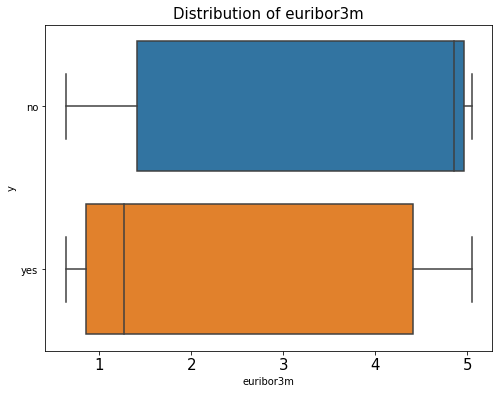

In [84]:
sns.boxplot(data['euribor3m'],data['y'])
plt.title('Distribution of euribor3m', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

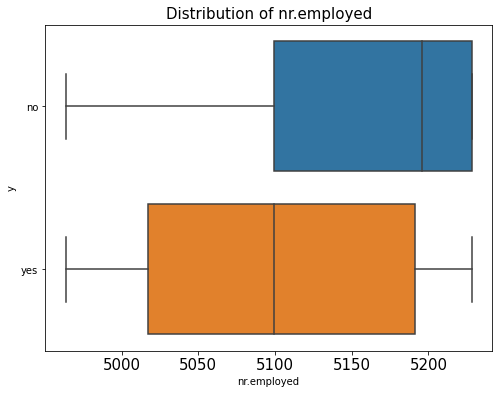

In [85]:
sns.boxplot(data['nr.employed'],data['y'])
plt.title('Distribution of nr.employed', fontsize = 15)
plt.xticks(rotation = 'horizontal', fontsize = 15)
plt.show()

In [86]:
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [87]:
cat_data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [88]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [89]:
data.skew()

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

C:\Users\ruthw\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ruthw\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ruthw\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


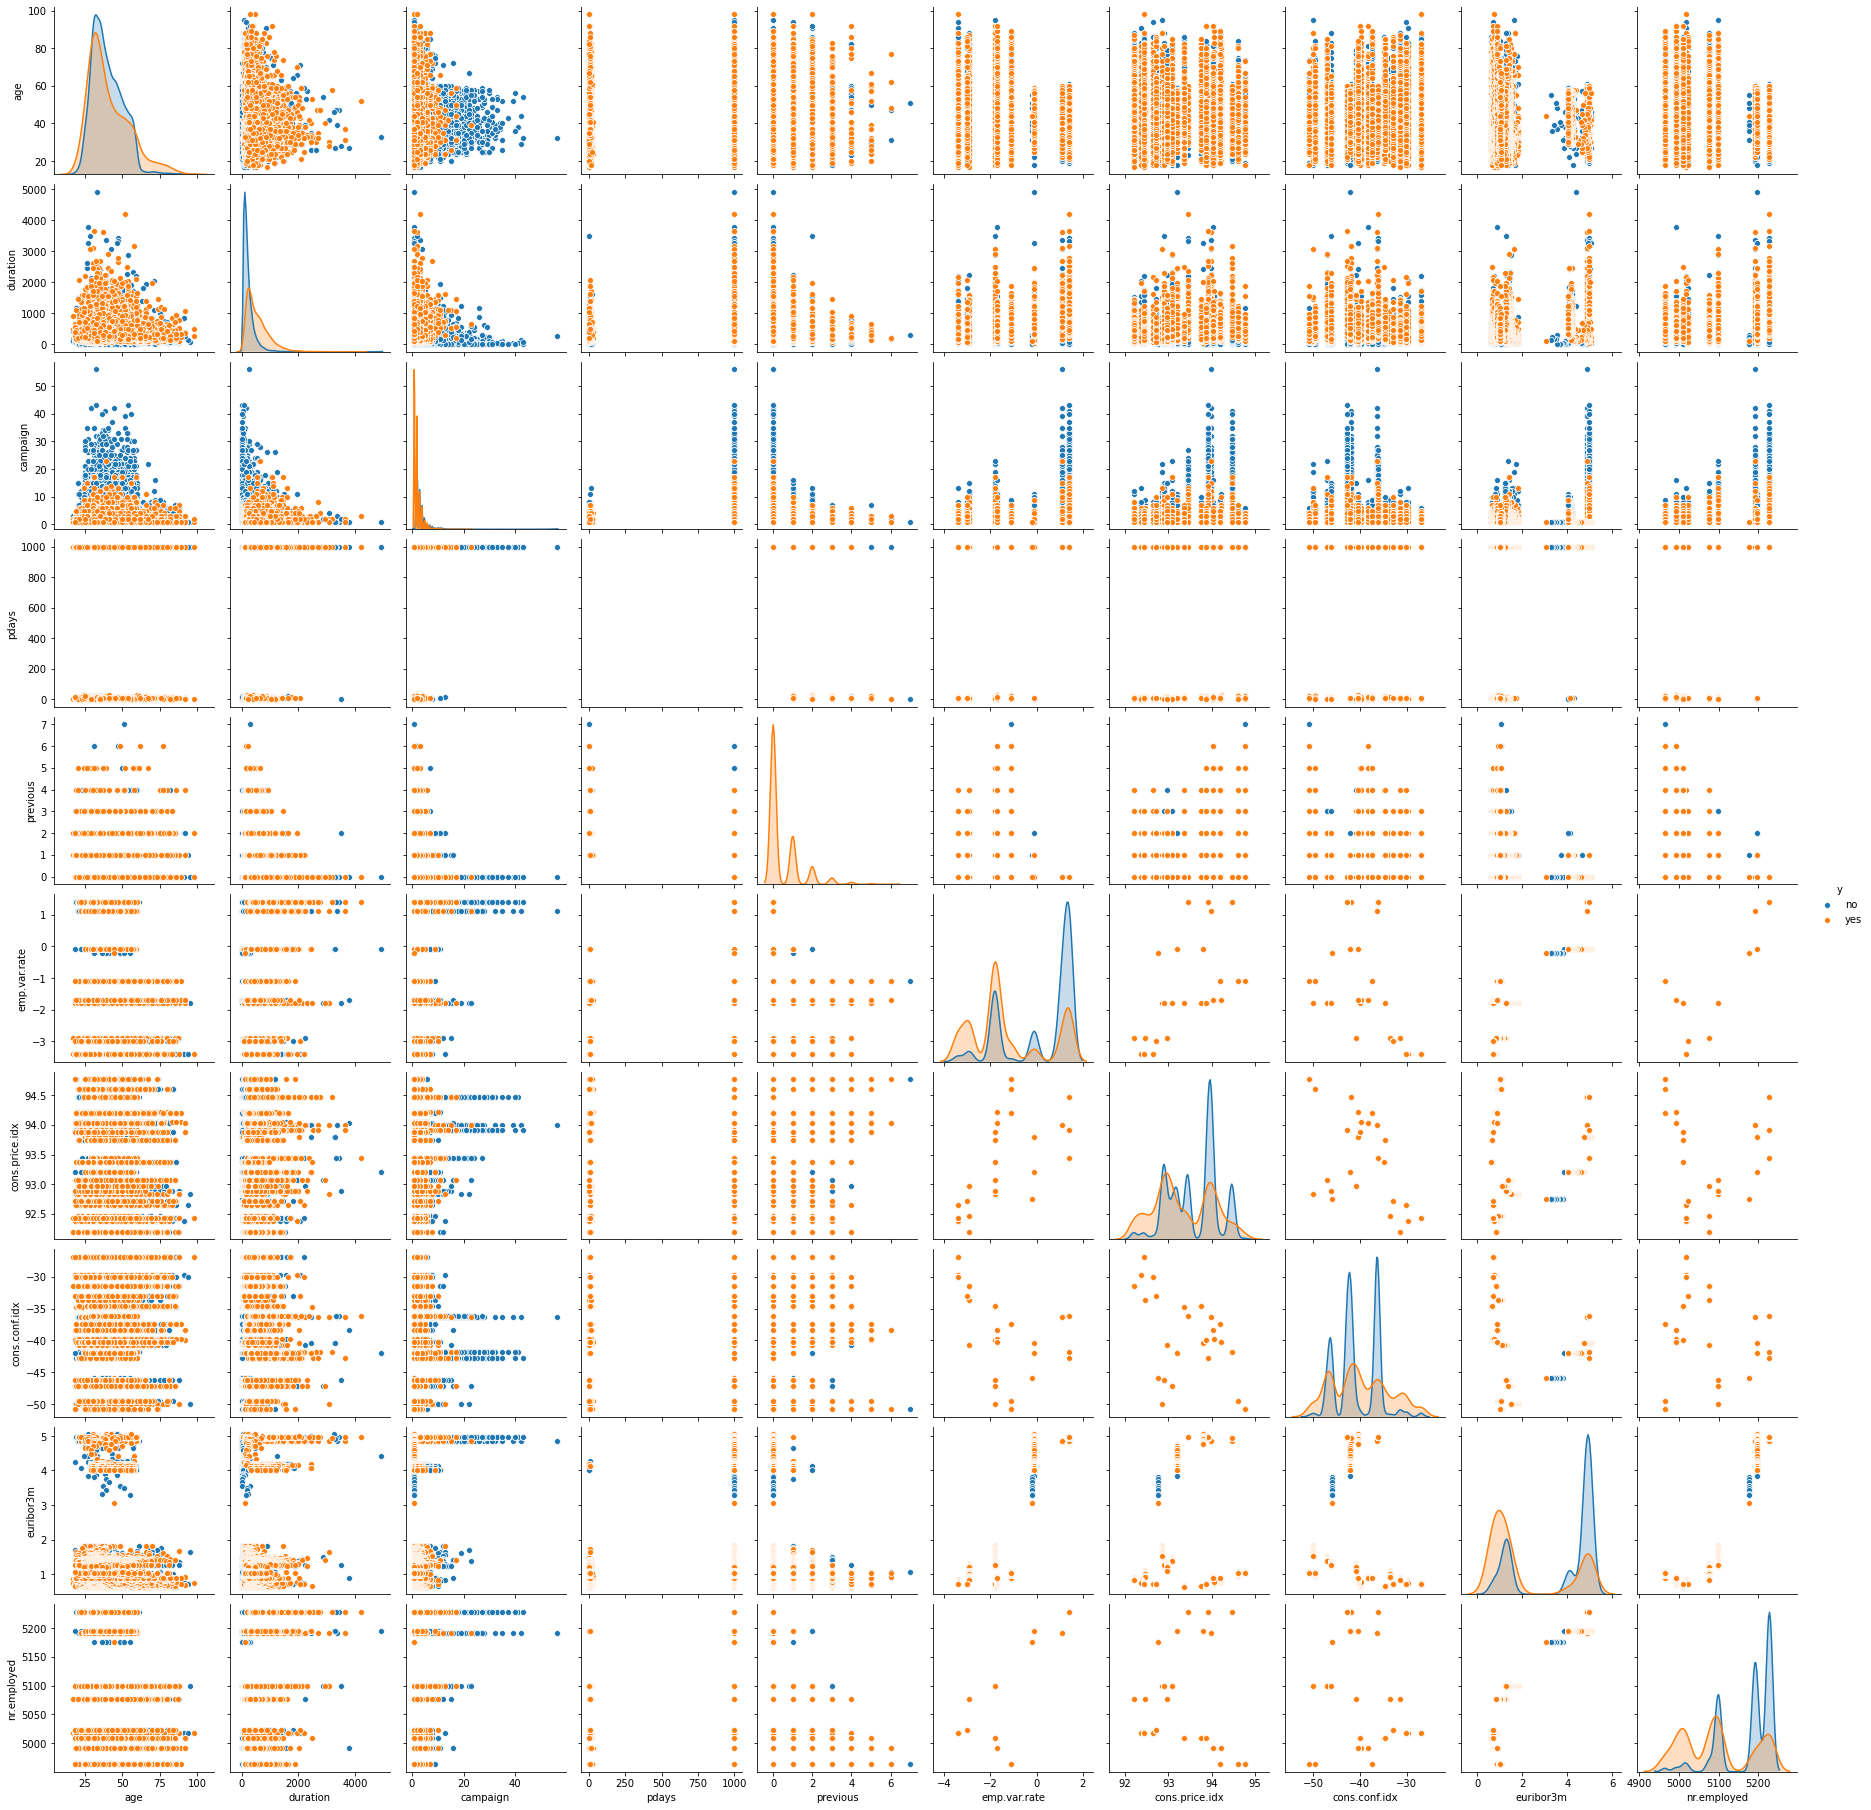

In [90]:
sns.pairplot(data,hue='y')

From the pairplot the some of the combinations of variables are showing two distinct clusters so together they could be more 
important in predicting the target variable.

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [92]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [93]:
pd.crosstab(data['default'],data['y'])

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


## Statistical Tests

In [94]:
single_age=data[data['marital']=='single']['age']
single_age

8        24
9        25
11       25
12       29
19       39
         ..
41155    31
41157    31
41172    31
41175    34
41182    29
Name: age, Length: 11568, dtype: int64

In [95]:
divorced_age=data[data['marital']=='divorced']['age']
divorced_age

13       57
34       54
71       44
75       41
85       31
         ..
41163    35
41165    38
41170    40
41176    38
41179    64
Name: age, Length: 4612, dtype: int64

In [96]:
married_age=data[data['marital']=='married']['age']
married_age

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: age, Length: 24928, dtype: int64

In [97]:
from scipy.stats import f_oneway 

Null Hypothesis : Sample Means are equal which means ages of single married and divorced people are equal.

Alternate Hypothesis : Sample Means are unequal which means ages of single married and divorced people are different.

In [98]:
f_oneway(married_age,single_age,divorced_age)

F_onewayResult(statistic=4384.183587793436, pvalue=0.0)

since pvalue is less than 0.05 so we reject the Null Hypothesis at 95% confidence interval.
Which means the ages of single and divorced people are different.

In [99]:
data.groupby(['marital'])['age'].mean()

marital
divorced    44.899393
married     42.307165
single      33.158714
unknown     40.275000
Name: age, dtype: float64

Clearly single people are having less age than married and divorced people.

In [100]:
from scipy.stats import chi2_contingency

In [101]:
marital_y=pd.crosstab(data['marital'],data['y']).T
marital_y

marital,divorced,married,single,unknown
y,,,,
no,4136,22396,9948,68
yes,476,2532,1620,12


Null Hypothesis : Proportion of people saying yes or no in the marital cat feature are equal. (insignificant in predicting the target)
Alternate Hypothesis :Proportion of people saying yes or no in the marital cat feature are unequal. (significant in predicting the target)


In [102]:
chi2_contingency(marital_y)

(122.65515182252989,
 2.068014648442211e-26,
 3,
 array([[4.09243896e+03, 2.21197568e+04, 1.02648165e+04, 7.09876663e+01],
        [5.19561037e+02, 2.80824318e+03, 1.30318345e+03, 9.01233369e+00]]))

pvalue is less than 0.05 so we reject the null hypothesis.
The marital feature is significant in predicting the target.

variable: 'campaign'

In [103]:
campaign_yes = data[data['y']=='yes']['campaign']
campaign_yes

75       1
83       1
88       1
129      1
139      1
        ..
41174    1
41178    2
41181    1
41183    1
41186    1
Name: campaign, Length: 4640, dtype: int64

In [104]:
campaign_no = data[data['y']=='no']['campaign']
campaign_no

0        1
1        1
2        1
3        1
4        1
        ..
41180    2
41182    1
41184    1
41185    2
41187    3
Name: campaign, Length: 36548, dtype: int64

Null Hypothesis : Avg number of contacts made during the campaign are equal for both the subscribing and non subscribing customers.
Alternate Hypothesis: Avg number of contacts made during the campaign are not equal for both subscribing and non subscribing 
customers.

In [105]:
f_oneway(campaign_yes,campaign_no)

F_onewayResult(statistic=182.1566728779567, pvalue=2.007779990638697e-41)

pval is less than 0.05, so rejecting the null hypothesis. 
Variable is significant in detecting the target


##### duration

In [106]:
dur_yes=data[data['y']=='yes']['duration']
dur_yes

75       1575
83       1042
88       1467
129       579
139       461
         ... 
41174     208
41178     483
41181     281
41183     334
41186     442
Name: duration, Length: 4640, dtype: int64

In [107]:
dur_no=data[data['y']=='no']['duration']
dur_no

0        261
1        149
2        226
3        151
4        307
        ... 
41180    254
41182    112
41184    383
41185    189
41187    239
Name: duration, Length: 36548, dtype: int64

Null Hypothesis : Avg duration of last call made during the campaign are equal for both the subscribing and non subscribing customers.
Alternate Hypothesis:Avg duration of last call made during the campaign are not equal for both subscribing and non subscribing 
customers.

In [108]:
from scipy.stats import ttest_ind 

In [109]:
ttest_ind(dur_yes,dur_no)

Ttest_indResult(statistic=89.9672253349018, pvalue=0.0)

pval is less rejecting the null hypo.

In [112]:
data['previous_campaign_contacted']=data['pdays'].apply(lambda x:'no' if x==999 else 'yes')

In [113]:
pd.crosstab(data['previous_campaign_contacted'],data['y'])

y,no,yes
previous_campaign_contacted,,
no,36000,3673
yes,548,967


The hypothesis we test is if the above difference of proportions will be zero or not equal to zero
(a two tailed test will be required). 
Mathematically, we represent it as:

(for the previous campaign contacted varible)

Ho-->Pyes=Pno

Ha-->Pyes!=Pno


In [115]:
from statsmodels.stats.proportion import proportions_ztest
count=[3673,967]

nobs=[36000+3673,548+967]
proportions_ztest(count,nobs)

(-65.93316354284998, 0.0)

Pval = 0 implies that the null hypothesis is rejected

ie proportions of people who subsribed in this campaign who are contacted durin the previous campaign

is not equal to proportions of people who subsribed in this campaign who are not contacted durin the previous campaign

In [118]:
data1=data[data['education']!='unknown']

In [121]:
ct=pd.crosstab(data1['y'],data1['education'])
ct

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
y,,,,,,,
no,3748,2104,5572,8484,14,4648,10498
yes,428,188,473,1031,4,595,1670


well go with chi square test here as there are many classes in the education categorical feature
vs 2 classes in the target feature

the null hypothesis (H0) which states that there is no relation between the variables. An alternate hypothesis would state that there is a significant relation between the two.

In [122]:
chi2_contingency(ct)

(176.13107270376491,
 2.2494049169426888e-35,
 6,
 array([[3.71148258e+03, 2.03704934e+03, 5.37258433e+03, 8.45659883e+03,
         1.59977697e+01, 4.65979481e+03, 1.08144923e+04],
        [4.64517424e+02, 2.54950655e+02, 6.72415668e+02, 1.05840117e+03,
         2.00223028e+00, 5.83205185e+02, 1.35350767e+03]]))

p value less than 0.05 which means we reject the ho ie there is a significant relation between the two variables

In [123]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'previous_campaign_contacted'],
      dtype='object')

as we can see that p value is <<0.05 we reject null hypothesis ie te feature can be significant in predicting the target

In [130]:
employ_yes=data[data['y']=='yes']['nr.employed']

In [132]:
employ_no=data[data['y']=='no']['nr.employed']

let us do a ttest to study if the averge employee number during subsribed custmers and not subsribed customers are same

null hypothesis:

    sample means are equal(U1=U2) ie feature maynot diferentiate well between classes of the target
    
alternate hypothesis:

    sample means are unequal(U1!=U2) ie feature diferentiates well between classes of the target

In [136]:
ttest_ind(employ_no,employ_yes)

Ttest_indResult(statistic=76.98448315100894, pvalue=0.0)

pval < 0.05 ie sample means are unequal(U1!=U2) ie feature diferentiates well between classes of the target

which means this could be a significant feature in our prediction problem

In [137]:
print(employ_no.mean(),employ_yes.mean())

5176.166600084341 5095.115991379272
